In [31]:
import numpy as np
import scipy as sp

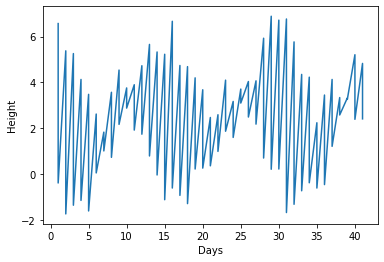

In [32]:
from matplotlib import pyplot as plt
days=[]
time=[]
height=[]
def osci():
    
     f = open("data.txt", "r")
     f.readline()
     f.readline()
     f.readline()
     for x in f:
         x.split()
         p=x.split()
         
         days.append(int(p[0]))
         time=p[1]
         height.append(float(p[2]));
        
        
        
     plt.plot(days,height)
     plt.xlabel('Days')
     plt.ylabel('Height')

      
osci()

Text(0, 0.5, 'y')

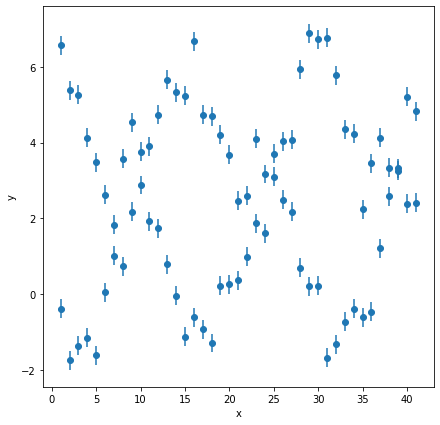

In [33]:
x = days

#make a complicated function
a = 1
b = 3
c = 5
d = 7
sig = 0.25

#define our noisy data
y = height
y_err = np.full(len(days), sig)

f = plt.figure(figsize=(7,7))
plt.errorbar(x, y, yerr=y_err, fmt='o')
plt.xlabel('x')
plt.ylabel('y')

In [49]:
from scipy import optimize

def f_line(x, a, b, c, d):
    return a*a*np.sin(np.sin(b*x + c) + d)

params, params_cov = optimize.curve_fit(f_line,x,y,sigma=y_err,p0 = [1.,2.,0.1,-0.1])

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]

print(a_fit, b_fit, c_fit, d_fit)
x = np.array(x)
y_fit = a_fit * np.sin(b_fit * x + c_fit) + d_fit

1.774709100152267 2.0151924071096157 0.4059150529240353 1.4744504041442488


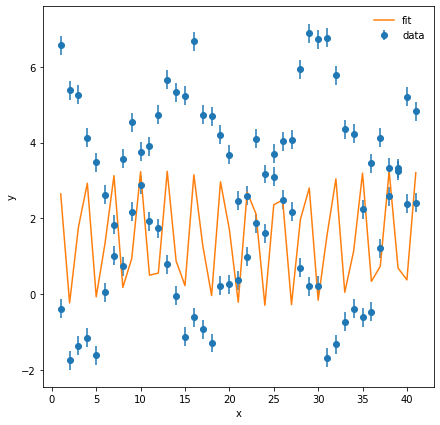

In [50]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x, y, yerr=y_err, fmt='o', label ='data')
plt.plot(x,y_fit,label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=0,frameon=False)